In [7]:
# built-in
import random
import copy
import sys

# basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# stats
import scipy.stats as st

# pd options
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)

In [8]:
sys.path.append("../")
from utils import generate_eda, plot_venn2, plot_distributions

In [9]:
# generate_eda()

In [10]:
train = pd.read_csv("../data/raw/train_fixed.csv")
test = pd.read_csv("../data/raw/test_fixed.csv")

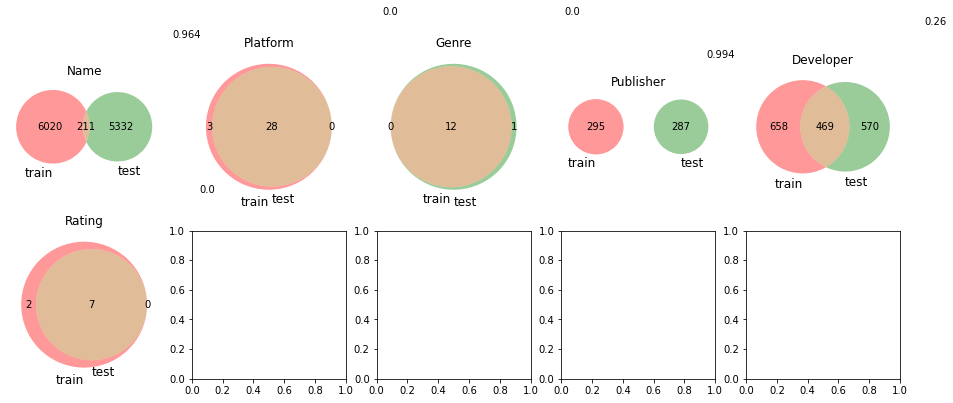

In [11]:
categorical_cols = ["Name", "Platform", "Genre", "Publisher", "Developer", "Rating"]
plot_venn2(train, test, include_cols=categorical_cols)

In [12]:
whole_df = pd.concat([train, test], ignore_index=True)